In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm

import sys
sys.path.append('../')
from model import nn_tools
from utils import utils


In [39]:
gamma_min=-13.3
gamma_max=5.0

In [45]:
class SigmoidSchedule(torch.nn.Module):
    def __init__(self, gamma_min, gamma_max):
        super().__init__()
        self.gamma_min = gamma_min
        self.gamma_max = gamma_max
        self.b=1/(np.exp(-self.gamma_min)+1)
        self.a=1/(np.exp(-self.gamma_max)+1)-self.b

    def forward(self, t):
        return -torch.log(1/(self.a*t+self.b)-1)

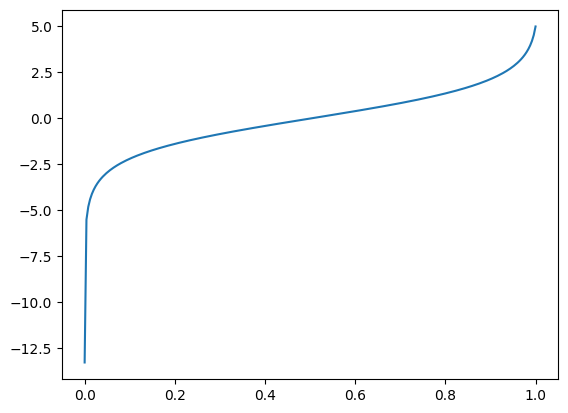

In [46]:
ts=torch.linspace(0,1,250)
sc=AlphaCosineSchedule(gamma_min, gamma_max)
gammas=sc(ts[:,None])[:,0]
plt.plot(ts, gammas)

In [47]:
sc.a,sc.b

(0.9933054745853097, 1.6744904055114527e-06)

In [23]:
gammas=-torch.log(1/ts-1)

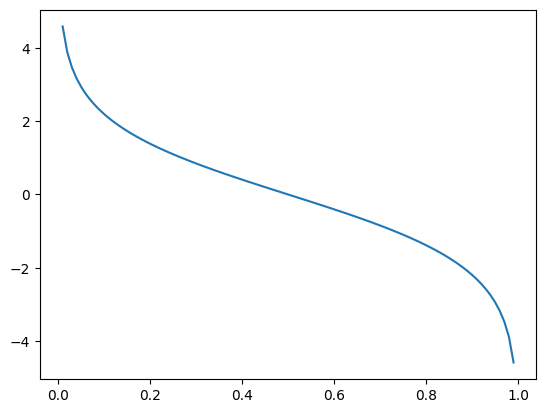

In [26]:
plt.plot(ts,-gammas)

In [46]:
gamma_schedule=nn_tools.NNSchedule(gamma_min,gamma_max)

In [47]:
ts=torch.linspace(0,1,100)
#overfit to some schedule
gamma_overfit=torch.sigmoid(5*ts) #this sigmoid is just to give some sort of non linearity
gamma_overfit=gamma_overfit*(gamma_max-gamma_min)+gamma_min

In [48]:
losses=[]

In [52]:
n_steps=3000
opt=torch.optim.Adam(gamma_schedule.parameters(),lr=0.01)
for i in tqdm.tqdm(range(n_steps)):
    loss=torch.sum((gamma_schedule(ts[:,None])[:,0]-gamma_overfit)**2)
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(loss.item())

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:03<00:00, 824.65it/s]


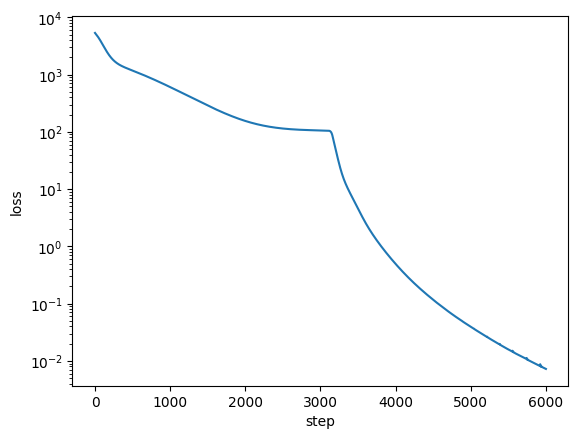

In [53]:
plt.plot(losses)
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('step')
plt.show()

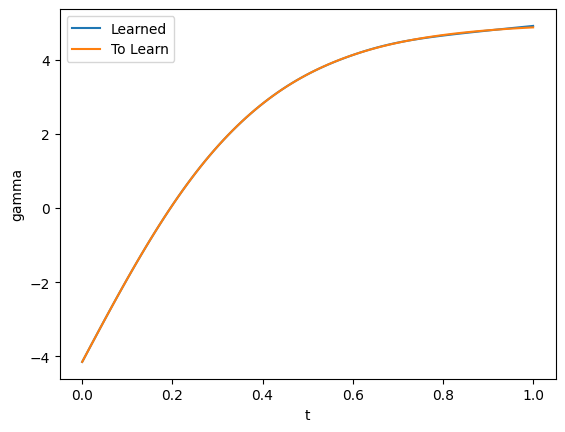

In [54]:
ts_np=utils.to_np(ts)
gamma_np=utils.to_np(gamma_schedule(ts[:,None])[:,0])
plt.plot(ts_np,gamma_np,label='Learned')
plt.plot(ts_np,gamma_overfit,label='To Learn')
plt.legend()
plt.ylabel('gamma')
plt.xlabel('t')
plt.show()

In [121]:
import importlib
importlib.reload(nn_tools)

<module 'model.nn_tools' from '/n/home12/cfpark00/Diffusion/vdm4cdm/analysis/../model/nn_tools.py'>

In [123]:
gamma_schedule2=nn_tools.NNSchedule(gamma_min,gamma_max)
gamma_schedule2.l2.weight.data*=30
gamma_schedule2.l2.bias.data*=10
gamma_schedule2.l3.weight.data*=1024
ts=torch.linspace(0,1,100)

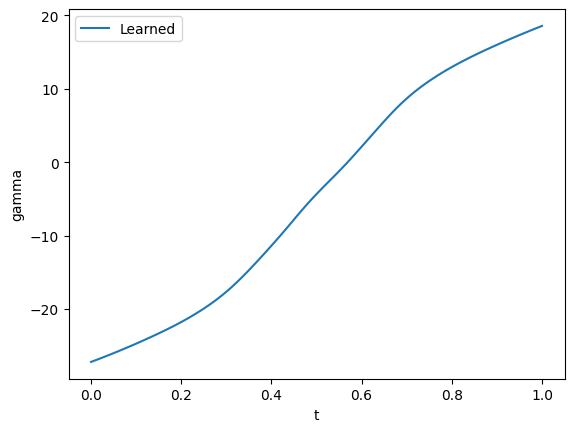

In [124]:
ts_np=utils.to_np(ts)
gamma_np=utils.to_np(gamma_schedule2(ts[:,None],scale=1.)[:,0])
plt.plot(ts_np,gamma_np,label='Learned')
plt.legend()
plt.ylabel('gamma')
plt.xlabel('t')
plt.show()

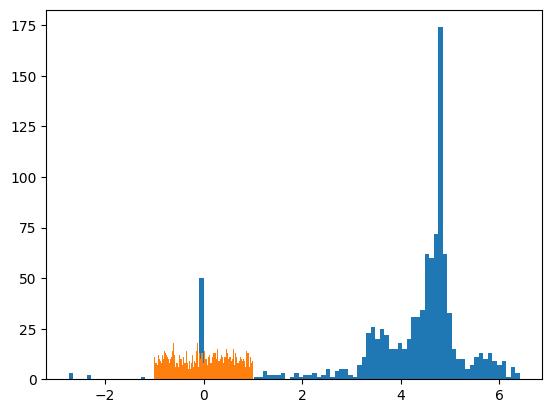

In [62]:
_=plt.hist(utils.to_np(gamma_schedule.l2.bias.data).flatten(),bins=100)
_=plt.hist(utils.to_np(gamma_schedule2.l2.bias.data).flatten(),bins=100)